# Auswertung 200218_4

### imports

In [1]:
import sys
sys.path.append("../toolbox/")
from workflow  import *

In [2]:
%load_ext autoreload

In [3]:
%autoreload

## define master data

In [4]:
measurement_id = "200218_4"
campaign_id    = "01_Messkampagne_1"
path_to_raw_data_folder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
path_to_hdf5_folder = "HDF5"

In [5]:
rawfolder, hdf5file = paths(measurement_id, campaign_id, path_to_raw_data_folder, path_to_hdf5_folder)

### import data

In [8]:
traceName = "Trace"
pulseMin = None
pulseMax = None


C1 = readChannel("C1", rawfolder, traceName, pulseMin, pulseMax)
C3 = readChannel("C3", rawfolder, traceName, pulseMin, pulseMax)

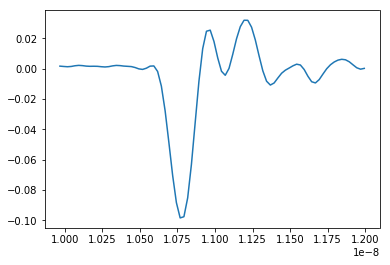

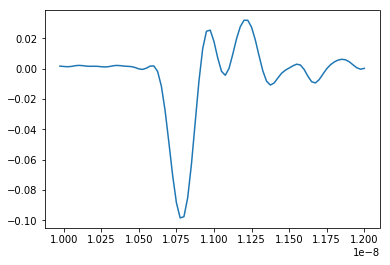

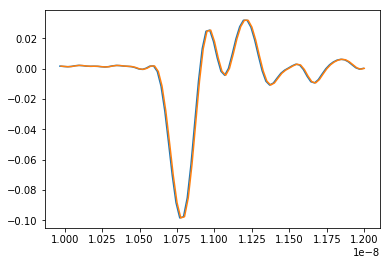

In [9]:
pulsnr = 123
viewImport(C1, C3, pulsnr)

### define area of interest

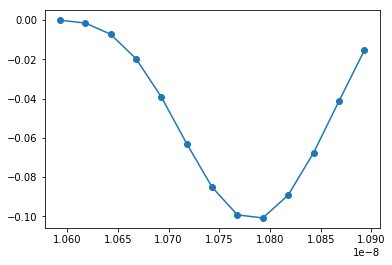

In [10]:
areaMinC1 = 25
areaMaxC1 = 38
pulsnr = 125

viewSelection(C1, pulsnr, areaMinC1, areaMaxC1)

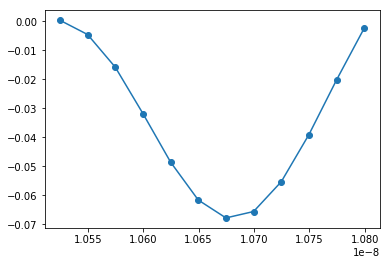

In [11]:
areaMinC3 = 22
areaMaxC3 = 34
pulsnr = 125

viewSelection(C3, pulsnr, areaMinC3, areaMaxC3)

## algorithm 1: fit gaussian function

In [12]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-11, 1.078e-8, 5e-11]
gaussParamsC3 = [-1.0e-11, 1.07e-8, 5e-11]

In [13]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)

In [14]:
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

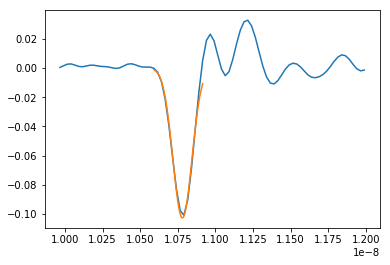

parameter: [-1.63242839e-11  1.07806479e-08  6.33917921e-11] [A, mu, sigma]


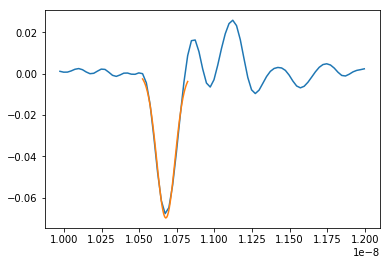

parameter: [-1.05423047e-11  1.06771807e-08  6.01710856e-11] [A, mu, sigma]


In [15]:
pulsnr = 125

viewFit(C1, pulsnr, areaMinC1, areaMaxC1, gaussParamsC1)
viewFit(C3, pulsnr, areaMinC3, areaMaxC3, gaussParamsC3)

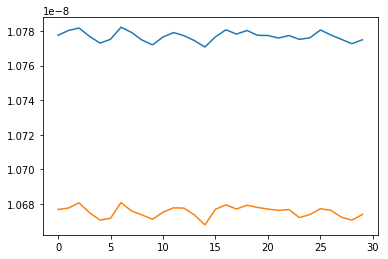

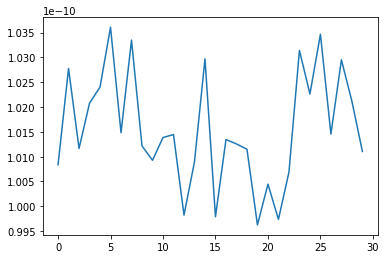

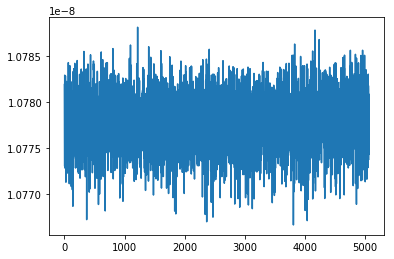

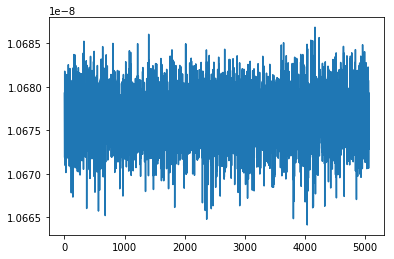

In [16]:
pulseMin = 100
pulseMax = 130

viewMu(C1, C3, pulseMin, pulseMax)

### histogram

In [17]:
JitterGauss = jitter(C1, C3, axis = 1)

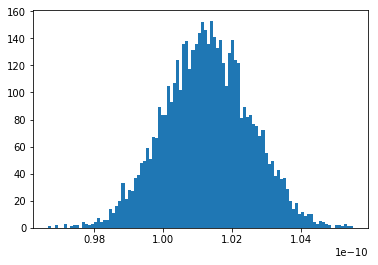

In [18]:
bins = 100

HistGauss = histogram(JitterGauss, bins)

### fit gauss to histogram

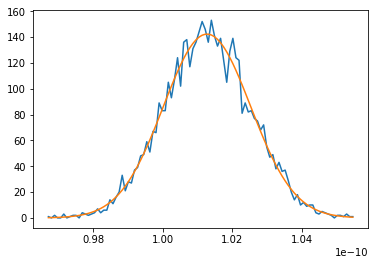

parameter: [4.47630655e-10 1.01274134e-10 1.25506897e-12] [A, mu, sigma]


In [20]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1.01e-10, 1e-12]

HistFitParamsGauss = fitSingle(np.array([HistGauss[0], HistGauss[1]]), None, None, gaussParamsHist)

### result GAUSSFIT

In [21]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsGauss)

σ_0: 1.255068973902153 ps
σ_1: 0.8874677823030545 ps
σ_1 = σ_0 / sqrt(2)

μ: 101.27413436229116 ps

coma separated [σ_0, σ_1, μ]
1.255068973902153e-12,8.874677823030544e-13,1.0127413436229116e-10

 tab separated [σ_0, σ_1, μ]
1.255068973902153e-12	8.874677823030544e-13	1.0127413436229116e-10


## algorithm 2: min

In [22]:
C1["min"] = minChannel(C1)
C3["min"] = minChannel(C3)

## algorithm 3: threshold

In [23]:
factor = 0.5

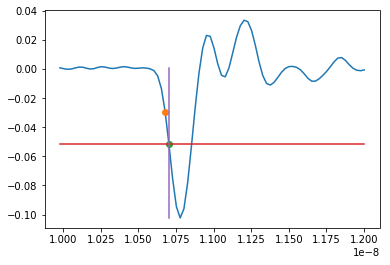

xt: 1.0702400214847353e-08 ps, yt -0.05114740150020225 ps


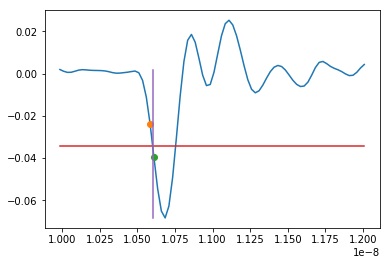

xt: 1.0601119947893101e-08 ps, yt -0.034193471394246444 ps


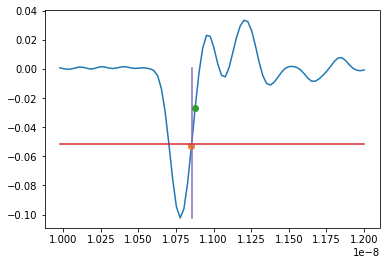

xt: 1.0854389603989931e-08 ps, yt -0.05114740150020225 ps


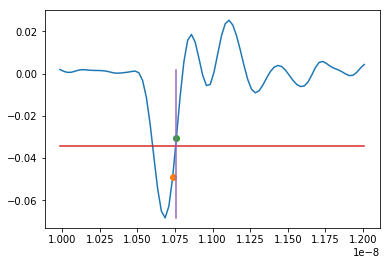

xt: 1.0754388020260543e-08 ps, yt -0.034193471394246444 ps


In [24]:
C1["thres5f"] = threshold(C1, factor, show=120)
C3["thres5f"] = threshold(C3, factor, show=120)
C1["thres5r"] = threshold(C1, factor, fallingEdge = False, show=120)
C3["thres5r"] = threshold(C3, factor, fallingEdge = False, show=120)

In [25]:
C1["thres5c"] = (C1["thres5r"] + C1["thres5f"]) / 2
C3["thres5c"] = (C3["thres5r"] + C3["thres5f"]) / 2

### histogram

In [26]:
JitterThres5f = jitter(C1, C3, storage = "thres5f", axis = 0)
JitterThres5c = jitter(C1, C3, storage = "thres5c", axis = 0)
JitterThres5r = jitter(C1, C3, storage = "thres5r", axis = 0)

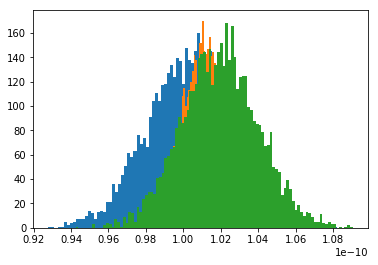

In [27]:
bins = 100

HistThres5f = histogram(JitterThres5f, bins)
HistThres5c = histogram(JitterThres5c, bins)
HistThres5r = histogram(JitterThres5r, bins)

### fit gauss to histogram

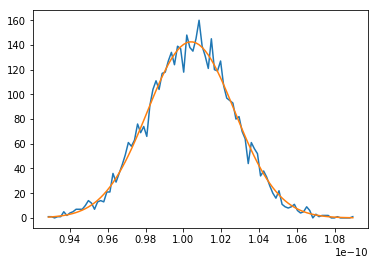

parameter: [8.21610199e-10 1.00406040e-10 2.29959420e-12] [A, mu, sigma]


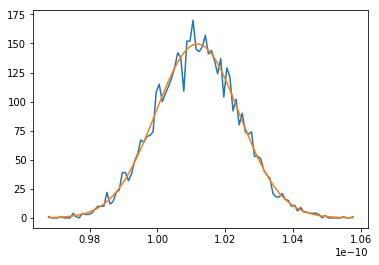

parameter: [4.59405624e-10 1.01173269e-10 1.22501412e-12] [A, mu, sigma]


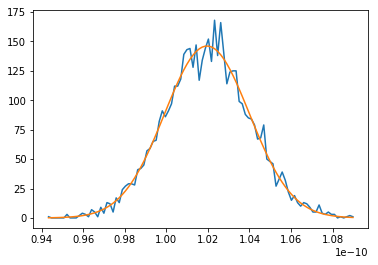

parameter: [7.47452438e-10 1.01954595e-10 2.04080517e-12] [A, mu, sigma]


In [28]:
# [A, mu, sigma]
gaussParamsThres5f = [1e-9, 1.01e-10, 1e-12]
gaussParamsThres5c = [1e-9, 1.02e-10, 1e-12]
gaussParamsThres5r = [1e-9, 1.01e-10, 1e-12]

HistFitParamsThres5f = fitSingle(np.array([HistThres5f[0], HistThres5f[1]]), None, None, gaussParamsThres5f)
HistFitParamsThres5c = fitSingle(np.array([HistThres5c[0], HistThres5c[1]]), None, None, gaussParamsThres5c)
HistFitParamsThres5r = fitSingle(np.array([HistThres5r[0], HistThres5r[1]]), None, None, gaussParamsThres5r)

### result

In [30]:
print("-- THRESHOLD 50% FALLING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5f)

print("\n--------------------------\n\n-- THRESHOLD 50% CENTER --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5c)

print("\n-------------------------------\n\n-- THRESHOLD 50% RISING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5r)

-- THRESHOLD 50% FALLING EDGE --
σ_0: 2.2995941989226347 ps
σ_1: 1.6260586520354414 ps
σ_1 = σ_0 / sqrt(2)

μ: 100.40604022858514 ps

coma separated [σ_0, σ_1, μ]
2.2995941989226347e-12,1.6260586520354413e-12,1.0040604022858514e-10

 tab separated [σ_0, σ_1, μ]
2.2995941989226347e-12	1.6260586520354413e-12	1.0040604022858514e-10

--------------------------

-- THRESHOLD 50% CENTER --
σ_0: 1.225014123674057 ps
σ_1: 0.8662157938992217 ps
σ_1 = σ_0 / sqrt(2)

μ: 101.17326948998489 ps

coma separated [σ_0, σ_1, μ]
1.2250141236740572e-12,8.662157938992217e-13,1.0117326948998489e-10

 tab separated [σ_0, σ_1, μ]
1.2250141236740572e-12	8.662157938992217e-13	1.0117326948998489e-10

-------------------------------

-- THRESHOLD 50% RISING EDGE --
σ_0: 2.040805172212532 ps
σ_1: 1.443067176352061 ps
σ_1 = σ_0 / sqrt(2)

μ: 101.95459487636671 ps

coma separated [σ_0, σ_1, μ]
2.040805172212532e-12,1.443067176352061e-12,1.0195459487636671e-10

 tab separated [σ_0, σ_1, μ]
2.040805172212532e-12	1.443